In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
%run rsi.ipynb
%run stoch.ipynb

data break down

In [28]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']
btc_low_price = btc_hist_data["Low"]
btc_high_price = btc_hist_data["High"]
btc_open_price = btc_hist_data["Open"]
btc_vol_price = btc_hist_data["Vol."]
btc_vol_price = btc_vol_price.str.replace('K','')
btc_chg_price = btc_hist_data["Change %"]


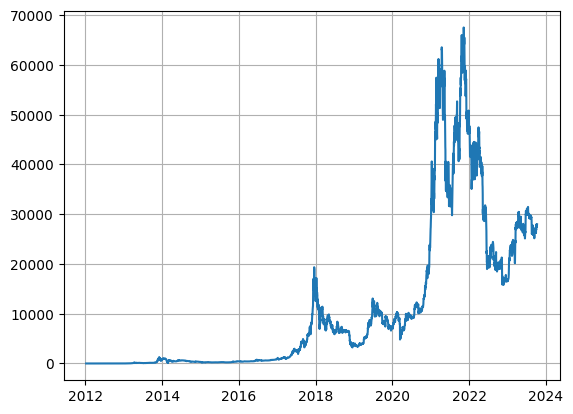

In [29]:
fig =plt.figure(1)
plt.plot(Date,btc_open_price.values)
plt.grid()
plt.show()

log of BTC  price

In [30]:
btc_close_price_np = btc_close_price.to_numpy()
btc_open_price_np = btc_open_price.to_numpy()
btc_low_price_np = btc_low_price.to_numpy()
btc_high_price_np = btc_high_price.to_numpy()

In [31]:
log_close_price =np.zeros(len(btc_close_price))
log_high_price =np.zeros(len(btc_close_price))
log_low_price =np.zeros(len(btc_close_price))
log_open_price =np.zeros(len(btc_close_price))

for i in range(len(btc_close_price)):
    log_close_price[i] = math.log10(btc_close_price_np[i])
    log_high_price[i] = math.log10(btc_high_price_np[i])
    log_low_price[i] = math.log10(btc_low_price_np[i])
    log_open_price[i] = math.log10(btc_open_price_np[i])
    



OHLC/4 of BTC price
HL/2 of BTC price
OC/2 of BTC price

In [32]:
ohlc = (log_close_price + log_high_price + log_low_price + log_open_price)/4
HL = (log_high_price + log_low_price)/2
OC = (log_close_price + log_open_price)/2

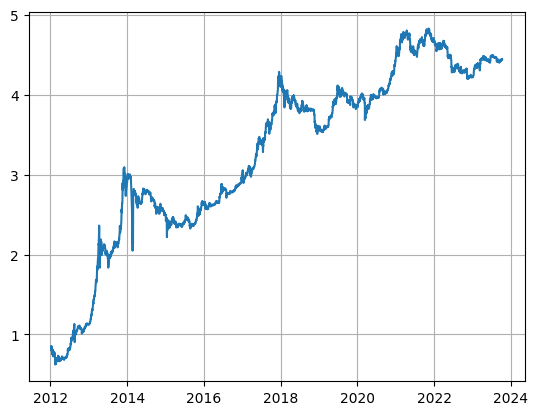

In [33]:
fig =plt.figure(2)
plt.plot(Date,log_close_price)

plt.grid()
plt.show()

Applynig RSI from rsi.ipynb

In [34]:
rsi_btc = rsi(btc_hist_data,14,True,21)

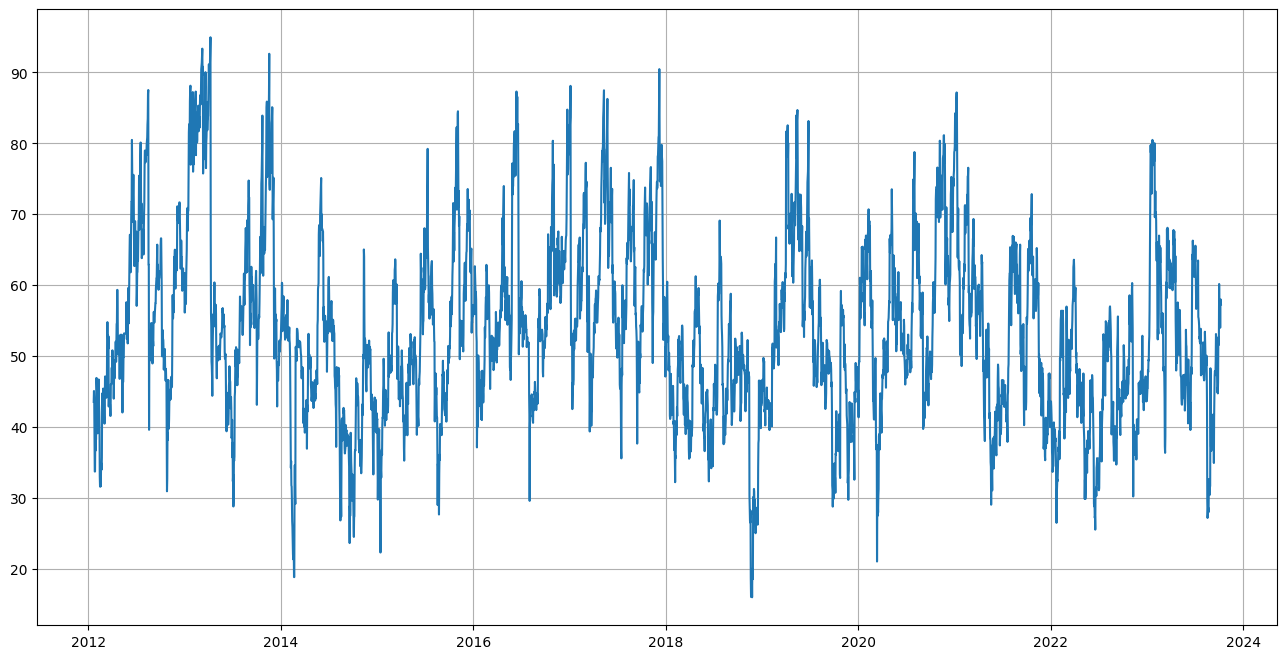

In [35]:
fig =  plt.figure(figsize=[16, 8])
plt.plot(Date,rsi_btc)

plt.grid()
plt.show()

Applying Stochastic on BTC close price

In [36]:
K , D = stochastic(btc_close_price,13 ,4,4)

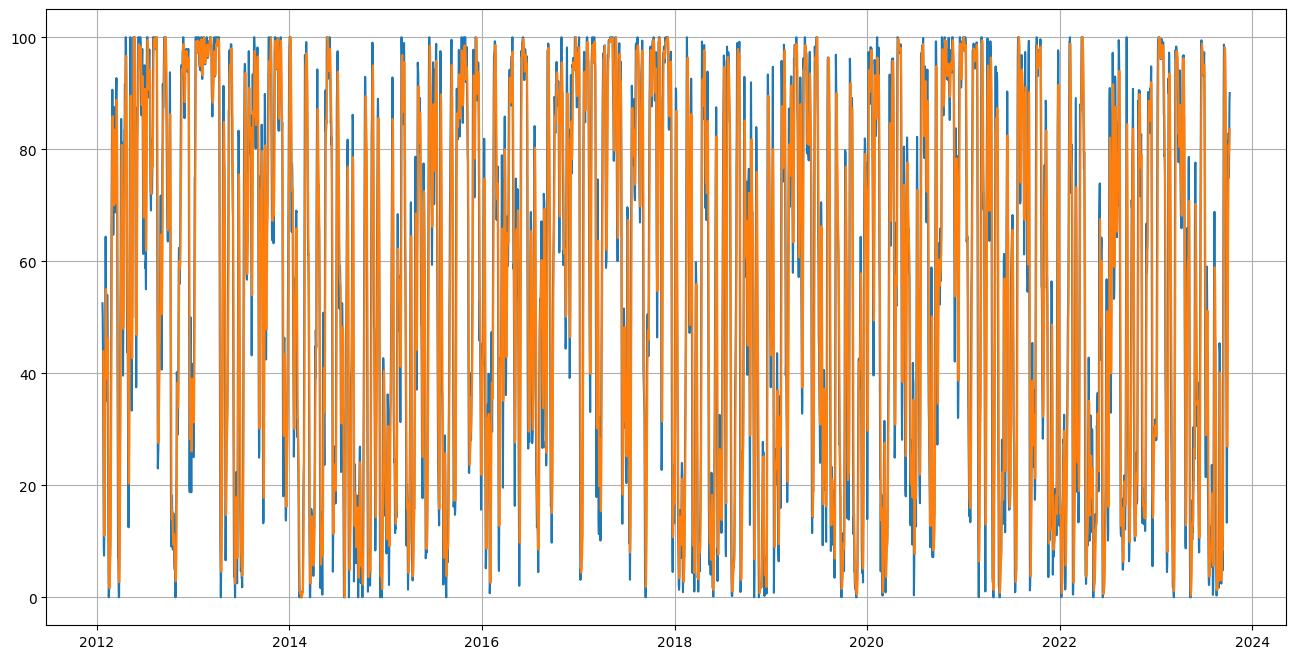

In [38]:
fig =  plt.figure(figsize=[16, 8])
plt.plot(Date,K)
plt.plot(Date,D)

plt.grid()
plt.show()